## Crude Oil

### Weekly

SVR RMSE: 3.204938144688053
SVR Accuracy: 99.15%


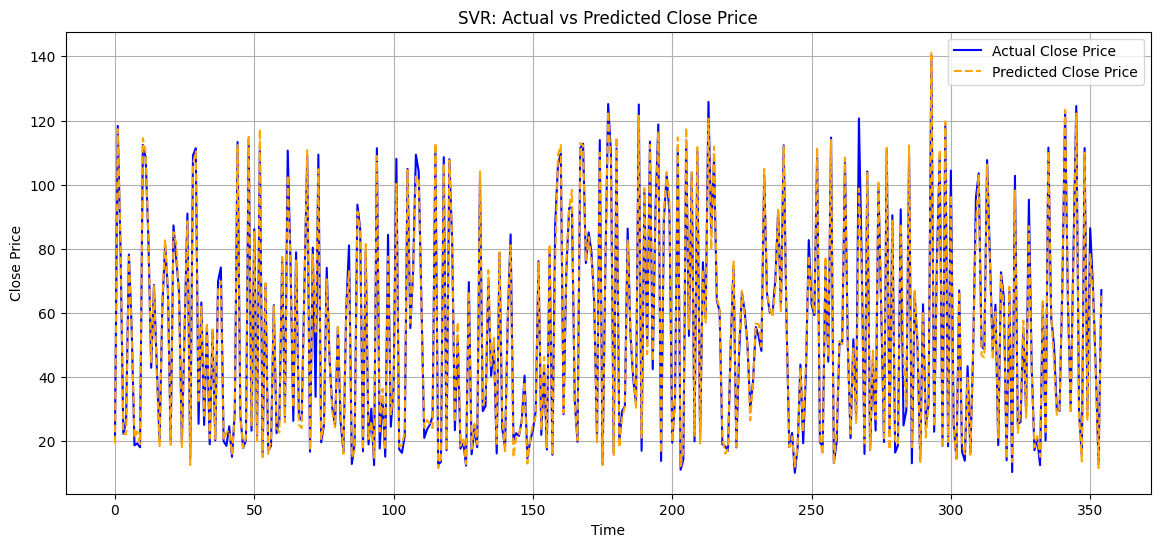

Future Close Prices with Dates:
        Date  Predicted Close
0 2024-09-08        70.162478
1 2024-09-15        62.179326
2 2024-09-22        62.146073
3 2024-09-29        62.284235
4 2024-10-06        62.308620


e:\TE MiniProject\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
e:\TE MiniProject\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
e:\TE MiniProject\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
e:\TE MiniProject\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
e:\TE MiniProject\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from math import sqrt
from datetime import timedelta

# Load and preprocess the dataset
file_path = "brent_crude_oil_atr_ema_rsi_w2.csv" 
df = pd.read_csv(file_path)

# Drop missing values
df = df.dropna()

# Convert Date column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Feature-target split
X = df.drop(columns=['Close'])  # Features
y = df['Close']  # Target

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Predictions
y_pred_scaled = svr.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluation Metrics
rmse = sqrt(mean_squared_error(y_test_rescaled, y_pred))
accuracy = r2_score(y_test_rescaled, y_pred) * 100

print(f"SVR RMSE: {rmse}")
print(f"SVR Accuracy: {accuracy:.2f}%")

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='orange', linestyle='--')
plt.title("SVR: Actual vs Predicted Close Price")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()

# Predict future values
def predict_future_svr(model, data, steps, scaler_X, scaler_y, feature_count):
    future_predictions = []
    last_data = data[-1].reshape(1, -1)

    for _ in range(steps):
        # Predict the next value
        next_pred_scaled = model.predict(last_data)
        next_pred = scaler_y.inverse_transform(next_pred_scaled.reshape(-1, 1)).flatten()[0]
        future_predictions.append(next_pred)

        # Update the input data
        next_row = np.roll(last_data, -1, axis=1)  # Shift all features left
        next_row[0, -1] = scaler_X.transform([[next_pred] + [0] * (feature_count - 1)])[0, 0]  # Add prediction
        last_data = next_row

    return future_predictions

# Generate future dates
last_date = df.index[-1]  # Get the last available date
next_date = last_date + timedelta(weeks=1)  # Start from the week after the last date
future_steps = 5
future_dates = [next_date + timedelta(weeks=i) for i in range(future_steps)]

# Predict next 5 weeks
future_prices = predict_future_svr(svr, X_scaled, future_steps, scaler_X, scaler_y, feature_count=X.shape[1])

# Prepare DataFrame for future predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Close': future_prices
})

print("Future Close Prices with Dates:")
print(future_df)




### Monthly

SVR RMSE: 5.286357864229507
SVR Accuracy: 97.50%


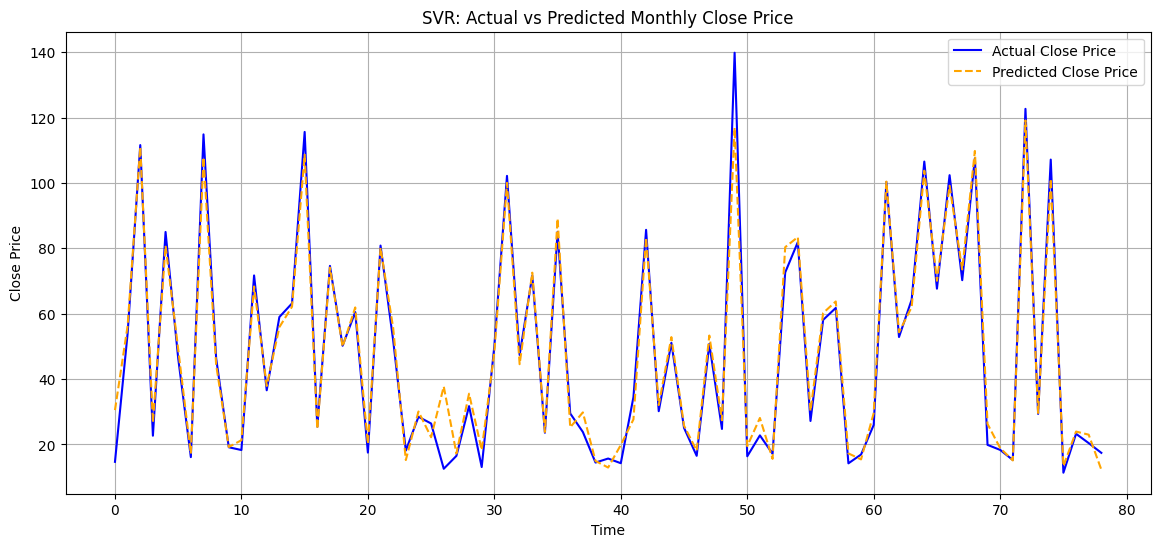

Future Monthly Close Prices with Dates:
        Date  Predicted Close
0 2024-11-01        70.264080
1 2024-12-01        59.320627
2 2025-01-01        59.320627
3 2025-02-01        59.320627
4 2025-03-01        59.320627


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from math import sqrt
from datetime import timedelta, datetime
from dateutil.relativedelta import relativedelta  # Import for monthly increments

# Load and preprocess the dataset
file_path = "brent_crude_oil_atr_ema_rsi_m2.csv"  
df = pd.read_csv(file_path)

# Drop missing values
df = df.dropna()

# Convert Date column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Feature-target split
X = df.drop(columns=['Close'])  # Features
y = df['Close']  # Target

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Predictions
y_pred_scaled = svr.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluation Metrics
rmse = sqrt(mean_squared_error(y_test_rescaled, y_pred))
accuracy = r2_score(y_test_rescaled, y_pred) * 100

print(f"SVR RMSE: {rmse}")
print(f"SVR Accuracy: {accuracy:.2f}%")

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='orange', linestyle='--')
plt.title("SVR: Actual vs Predicted Monthly Close Price")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()

# Predict future values
def predict_future_svr(model, data, steps, scaler_X, scaler_y):
    future_predictions = []
    last_data = data[-1].reshape(1, -1)

    for _ in range(steps):
        # Predict the next value
        next_pred_scaled = model.predict(last_data)
        next_pred = scaler_y.inverse_transform(next_pred_scaled.reshape(-1, 1)).flatten()[0]
        future_predictions.append(next_pred)

        # Update the input data
        next_row = last_data.flatten().tolist()
        next_row[-1] = next_pred  # Replace the last column with predicted value
        last_data = np.array(next_row).reshape(1, -1)

    return future_predictions

# Generate future dates
last_date = df.index[-1]  # Get the last available date
future_steps = 5  # Predicting for the next 5 months
future_dates = [last_date + relativedelta(months=i) for i in range(1, future_steps + 1)]

# Predict next 5 months
future_prices = predict_future_svr(svr, X_scaled, future_steps, scaler_X, scaler_y)

# Prepare DataFrame for future predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Close': future_prices
})

print("Future Monthly Close Prices with Dates:")
print(future_df)


# Carbon BLack


### Monthly

SVR RMSE: 41.0272026360659
SVR Accuracy: 97.31%


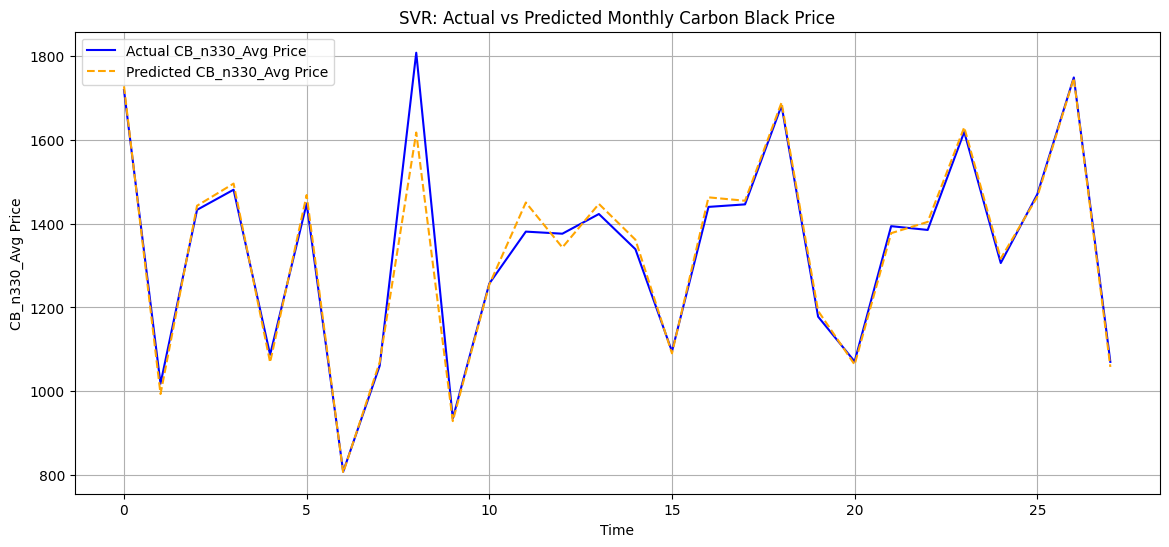

Future Monthly Carbon Black Prices with Dates:
        Date  Predicted CB_n330_Avg
0 2023-09-01            1775.836590
1 2023-10-01            1419.458561
2 2023-11-01            1419.458561
3 2023-12-01            1419.458561
4 2024-01-01            1419.458561


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from math import sqrt
from datetime import datetime
from dateutil.relativedelta import relativedelta  # For monthly increments

# Load dataset
file_path = "Carbon_Black_Historical_Data2.csv"  
df = pd.read_csv(file_path)

# Drop missing values
df = df.dropna()

# Convert Date column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)

# Feature-target split
X = df.drop(columns=['CB_n330_Avg'])  # Features
y = df['CB_n330_Avg']  # Target (Carbon Black Average Price)

# Scale the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Predictions
y_pred_scaled = svr.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluation Metrics
rmse = sqrt(mean_squared_error(y_test_rescaled, y_pred))
accuracy = r2_score(y_test_rescaled, y_pred) * 100

print(f"SVR RMSE: {rmse}")
print(f"SVR Accuracy: {accuracy:.2f}%")

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='Actual CB_n330_Avg Price', color='blue')
plt.plot(y_pred, label='Predicted CB_n330_Avg Price', color='orange', linestyle='--')
plt.title("SVR: Actual vs Predicted Monthly Carbon Black Price")
plt.xlabel("Time")
plt.ylabel("CB_n330_Avg Price")
plt.legend()
plt.grid()
plt.show()

# Predict future values
def predict_future_svr(model, data, steps, scaler_X, scaler_y):
    future_predictions = []
    last_data = data[-1].reshape(1, -1)

    for _ in range(steps):
        # Predict the next value
        next_pred_scaled = model.predict(last_data)
        next_pred = scaler_y.inverse_transform(next_pred_scaled.reshape(-1, 1)).flatten()[0]
        future_predictions.append(next_pred)

        # Update the input data
        next_row = last_data.flatten().tolist()
        next_row[-1] = next_pred  # Replace the last column with predicted value
        last_data = np.array(next_row).reshape(1, -1)

    return future_predictions

# Generate future dates
last_date = df.index[-1]  # Get the last available date
future_steps = 5  # Predicting for the next 5 months
future_dates = [last_date + relativedelta(months=i) for i in range(1, future_steps + 1)]

# Predict next 5 months
future_prices = predict_future_svr(svr, X_scaled, future_steps, scaler_X, scaler_y)

# Prepare DataFrame for future predictions
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted CB_n330_Avg': future_prices
})

print("Future Monthly Carbon Black Prices with Dates:")
print(future_df)
